In [62]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import seaborn as sns
import numpy as np

# Load the data
df = pd.read_csv("../data/Diabetes_US_Hospitals_dataset/diabetic_data.csv")
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


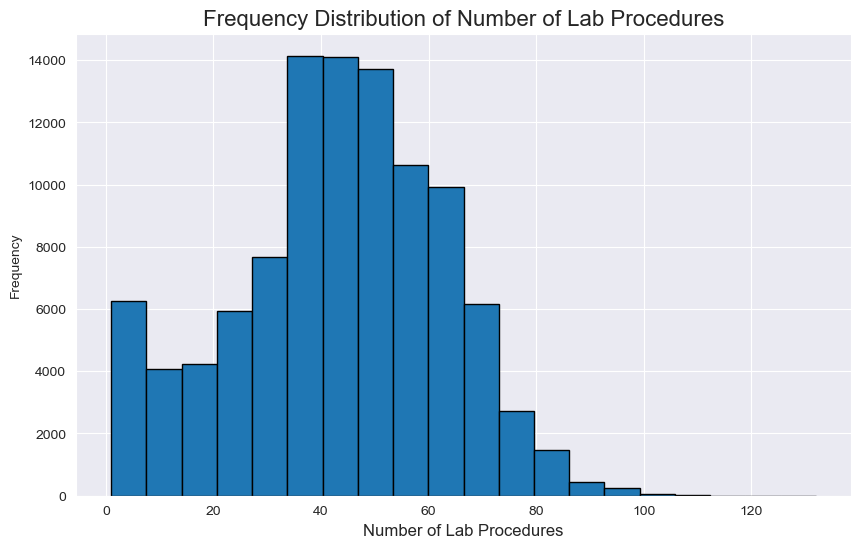

In [63]:
numOfProcedures = df['num_lab_procedures']

# Visualize the distribution with a histogram
plt.figure(figsize=(10, 6))
plt.hist(numOfProcedures, bins=20, edgecolor='black')
plt.title('Frequency Distribution of Number of Lab Procedures', fontsize=16)
plt.xlabel('Number of Lab Procedures', fontsize=12)
plt.ylabel('Frequency')
plt.show()

In [64]:
# Summary Measures
mean = numOfProcedures.mean()
median = numOfProcedures.median()
mode = numOfProcedures.mode()[0]  # mode can have multiple values, take the first one
range_val = numOfProcedures.max() - numOfProcedures.min()
variance = numOfProcedures.var()
std_deviation = numOfProcedures.std()

print(f"Mean: {mean}")
print(f"Median: {median}")
print(f"Mode: {mode}")
print(f"Range: {range_val}")
print(f"Variance: {variance}")
print(f"Standard Deviation: {std_deviation}")

Mean: 43.09564098028811
Median: 44.0
Mode: 1
Range: 131
Variance: 387.0805299104859
Standard Deviation: 19.67436224914256


2. Bivariate Analysis


Qualitative variables and association between them


In [65]:
df_clean = df.dropna(subset=['gender', 'discharge_disposition_id', 'time_in_hospital', 'num_lab_procedures'])
# Association between Two Qualitative Variables: Gender and Discharge Disposition
gender = df_clean['gender']
timeInHospital = df_clean['time_in_hospital']
dischargeDispositionId = df_clean['discharge_disposition_id']
numOfProcedures = df_clean['num_lab_procedures']

# 1. Association between two qualitative variables: Gender vs DischargeDisposition
# Create a contingency table
contingency_table = pd.crosstab(gender, dischargeDispositionId)
print("\nContingency Table (Gender vs Discharge Disposition):\n")
print(contingency_table)



Contingency Table (Gender vs Discharge Disposition):

discharge_disposition_id     1     2     3    4    5     6    7   8   9   10  \
gender                                                                         
Female                    30835   953  8820  505  660  7313  249  46  10   4   
Male                      29397  1175  5134  310  524  5589  374  62  11   2   
Unknown/Invalid               2     0     0    0    0     0    0   0   0   0   

discharge_disposition_id  ...  17    18  19  20    22   23  24   25  27  28  
gender                    ...                                                
Female                    ...   9  1966   4   1  1178  236  32  531   0  65  
Male                      ...   5  1725   4   1   814  176  16  458   5  74  
Unknown/Invalid           ...   0     0   0   0     1    0   0    0   0   0  

[3 rows x 26 columns]


In [66]:
# Perform Chi-Square Test of Independence
chi2, p_value, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-Square Test p-value: {p_value}")
print(f"p-value: {p_value}")
print(f"Degrees of freedom: {dof}")
print(f"Expected values: \n {expected}")

Chi-Square Test p-value: 3.0767017705147357e-159
p-value: 3.0767017705147357e-159
Degrees of freedom: 50
Expected values: 
 [[3.23809688e+04 1.14398349e+03 7.50147821e+03 4.38132775e+02
  6.36502093e+02 6.93593750e+03 3.34916220e+02 5.80593125e+01
  1.12893108e+01 3.22551736e+00 8.82716585e+02 1.61275868e+00
  2.14496905e+02 1.99982077e+02 3.38679323e+01 5.91344850e+00
  7.52620718e+00 1.98423076e+03 4.30068982e+00 1.07517245e+00
  1.07140935e+03 2.21485526e+02 2.58041389e+01 5.31672779e+02
  2.68793114e+00 7.47244856e+01]
 [2.78512555e+04 9.83953776e+02 6.45211043e+03 3.76843199e+02
  5.47463003e+02 5.96568215e+03 2.88065415e+02 4.99375037e+01
  9.71007016e+00 2.77430576e+00 7.59235010e+02 1.38715288e+00
  1.84491333e+02 1.72006957e+02 2.91302105e+01 5.08622723e+00
  6.47338011e+00 1.70666043e+03 3.69907435e+00 9.24768587e-01
  9.21531897e+02 1.90502329e+02 2.21944461e+01 4.57298066e+02
  2.31192147e+00 6.42714168e+01]
 [1.77566181e+00 6.27321502e-02 4.11355463e-01 2.40257060e-02
  3.

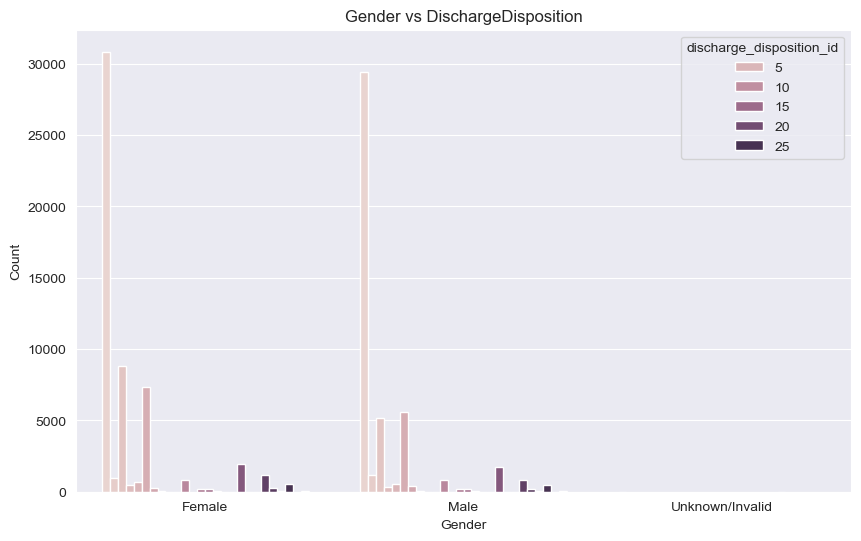

In [67]:
# Visualize the association with a bar plot
plt.figure(figsize=(10, 6))
sns.countplot(data=df_clean, x=gender, hue=dischargeDispositionId)
plt.title('Gender vs DischargeDisposition')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

Quantitative variables and association between them


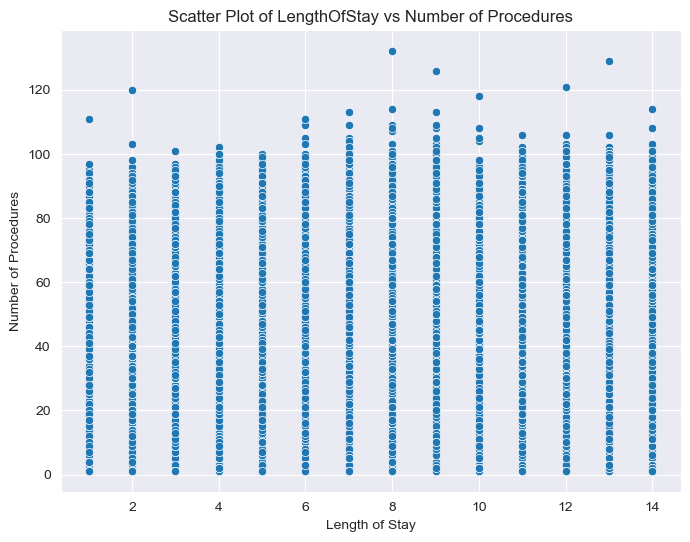

Covariance:  [[  8.91086838  18.70260757]
 [ 18.70260757 387.08052991]]
Pearson Correlation between LengthOfStay and Number of Procedures: 0.31845016879981525
P-value: 0.0


In [70]:
# Correlation between two quantitative variables: LengthOfStay vs Number of Procedures
# Visualize the correlation with a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_clean, x=timeInHospital, y=numOfProcedures)
plt.title('Scatter Plot of LengthOfStay vs Number of Procedures')
plt.xlabel('Length of Stay')
plt.ylabel('Number of Procedures')
plt.show()

from scipy.stats import pearsonr

# Calculate the covariance
covariance = np.cov(timeInHospital, numOfProcedures)
print(f"Covariance: ", covariance)

# Calculate Pearson Correlation
corr, p_value = pearsonr(timeInHospital, numOfProcedures)

print(f"Pearson Correlation between LengthOfStay and Number of Procedures: {corr}")
print(f"P-value: {p_value}")